In [1]:
#Powtórz to wszystko co dziś robiliśmy dla zbioru Iris. 
#Na końcu wyświelt wykres 3D
#Ile jest klas w zbiorze, a na ile klastrów powinno podzielić się zbiór wg wyznaczonych miar?

In [2]:
import pandas as pd

df = pd.read_csv('./datasets/Iris.csv')
df2= pd.read_csv('./datasets/Iris.csv')

In [3]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [5]:
df=df.iloc[:,1:5]
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


Text(0.5, 0, 'Petal Length')

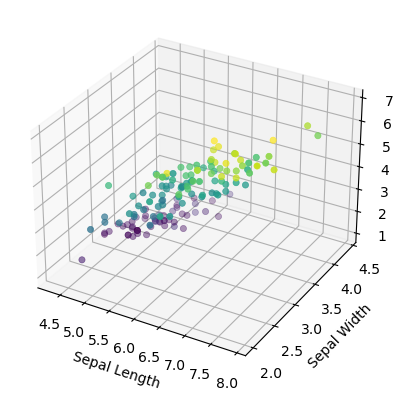

In [6]:
import matplotlib.pyplot as plt
#matplotlib notebook

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(df["SepalLengthCm"], df["SepalWidthCm"], df["PetalLengthCm"], c=df["PetalWidthCm"], cmap='viridis', linewidth=0.5);
ax.set_xlabel('Sepal Length')
ax.set_ylabel('Sepal Width')
ax.set_zlabel('Petal Length')

c:\Users\Lenovo\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
c:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_i

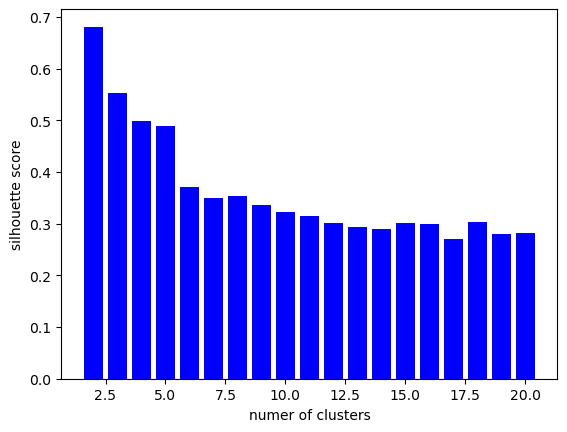

In [7]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

def get_kmeans_score(data, k):
    kmeans = KMeans(n_clusters=k)
    model = kmeans.fit(data)
    labels = model.predict(data)
    return silhouette_score(data, model.labels_, metric='euclidean'), labels

results = []
k_list = list(range(2,21))

for k in k_list:
    results.append(get_kmeans_score(df, k)[0])


plt.bar(k_list, results, color='b')
plt.xlabel('numer of clusters')
plt.ylabel('silhouette score')
plt.show()


c:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there

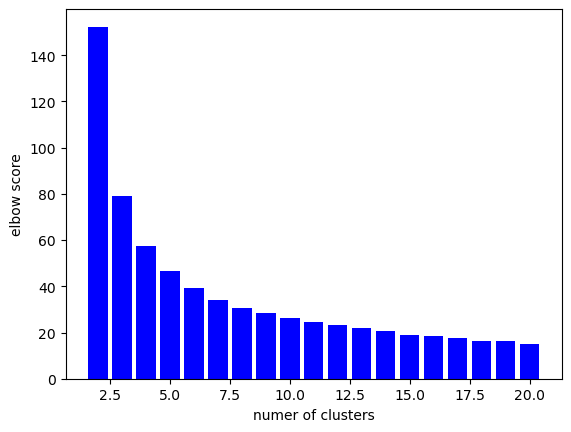

In [8]:
def get_kmeans_score(data, k):
    kmeans = KMeans(n_clusters=k)
    model = kmeans.fit(data)
    return abs(model.score(data))

results = []
k_list = list(range(2,21))

for k in k_list:
    results.append(get_kmeans_score(df, k))

plt.bar(k_list, results, color='b')
plt.xlabel('numer of clusters')
plt.ylabel('elbow score')
plt.show()

In [9]:
temp = pd.get_dummies(df2.Species, prefix='is')
temp

,is_Iris-setosa,is_Iris-versicolor,is_Iris-virginica
0,True,False,False
1,True,False,False
2,True,False,False
3,True,False,False
4,True,False,False
...,...,...,...
145,False,False,True
146,False,False,True
147,False,False,True
148,False,False,True


In [10]:
df2['Is Setosa']=temp['is_Iris-setosa']
df2['Is Versicolor']=temp['is_Iris-versicolor']

In [11]:
df2.drop(['Species'], axis=1, inplace=True)
df2

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Is Setosa,Is Versicolor
0,1,5.1,3.5,1.4,0.2,True,False
1,2,4.9,3.0,1.4,0.2,True,False
2,3,4.7,3.2,1.3,0.2,True,False
3,4,4.6,3.1,1.5,0.2,True,False
4,5,5.0,3.6,1.4,0.2,True,False
...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,False,False
146,147,6.3,2.5,5.0,1.9,False,False
147,148,6.5,3.0,5.2,2.0,False,False
148,149,6.2,3.4,5.4,2.3,False,False


c:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there

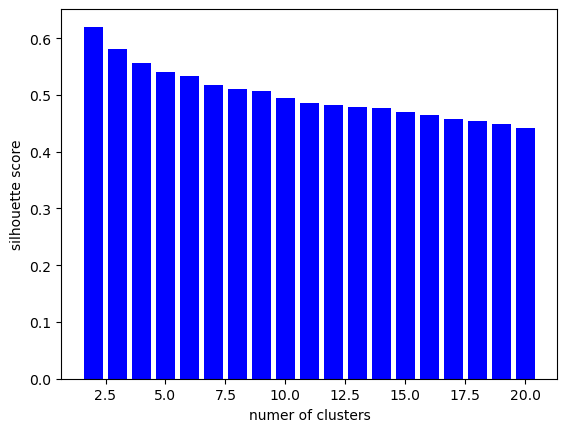

In [12]:
def get_kmeans_score(data, k):
    kmeans = KMeans(n_clusters=k)
    model = kmeans.fit(data)
    labels = model.predict(data)
    return silhouette_score(data, model.labels_, metric='euclidean'), labels

results = []
k_list = list(range(2,21))

for k in k_list:
    results.append(get_kmeans_score(df2, k)[0])


plt.bar(k_list, results, color='b')
plt.xlabel('numer of clusters')
plt.ylabel('silhouette score')
plt.show()